In [5]:
import torch
import matplotlib.pylab as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from torch import nn

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(
    n_samples=1000,
    n_features=NUM_FEATURES,
    centers=NUM_CLASSES,
    cluster_std=1.5,
    random_state=RANDOM_SEED
)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,y_blob, test_size=0.2,random_state=RANDOM_SEED)

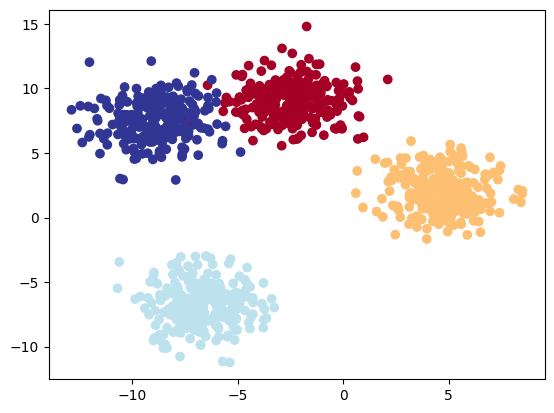

In [6]:
plt.plot(figsize=(10,7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [10]:
class BlobModel(nn.Module):
    def __init__(self, input_features, out_features, hidden_units=8):
        """
            Initialize multi class classfication

            Args:
                input_features (int): no of input features to the model
                out_features (int): no of out features to the model
                hidden_units (int) : no of hidden units between layers, default 8
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=out_features)
        )
    def forward(self, X):
        return self.linear_layer_stack(X)

In [11]:
model_0 = BlobModel(input_features=2, out_features=10, hidden_units=8)

In [12]:
model_0

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=10, bias=True)
  )
)